# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

In [2]:
ais = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/ais.csv')
ais.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [3]:
ais.set_index(['id'])

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis


In [8]:
ais.sport = ais.sport.astype('category')

In [9]:
ais.sex = ais.sex.astype('category')

In [10]:
ais.sport.value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

<AxesSubplot:xlabel='sex', ylabel='count'>

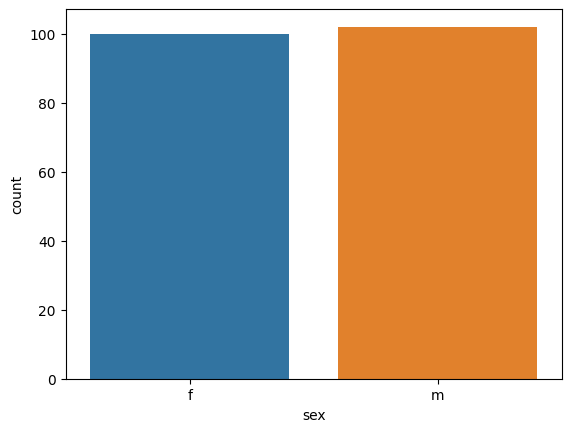

In [11]:
sns.countplot(data=ais, x='sex')

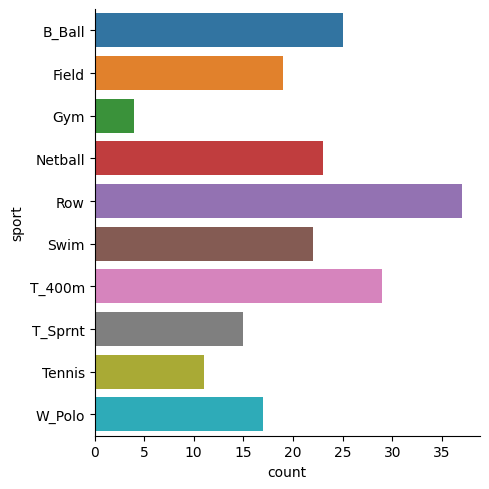

In [12]:
sns.catplot(data=ais, kind="count", y="sport")

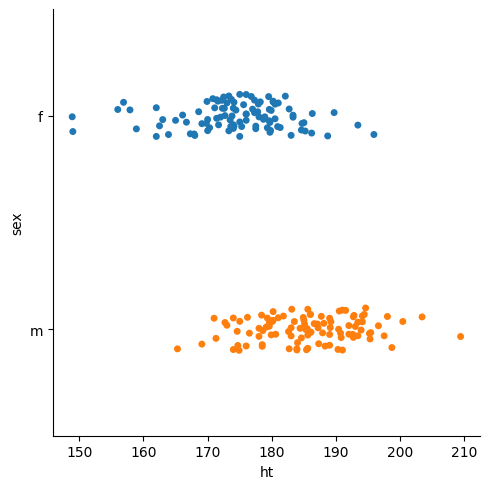

In [14]:
sns.catplot(data=ais, x='ht', y='sex')

<AxesSubplot:xlabel='ht', ylabel='sex'>

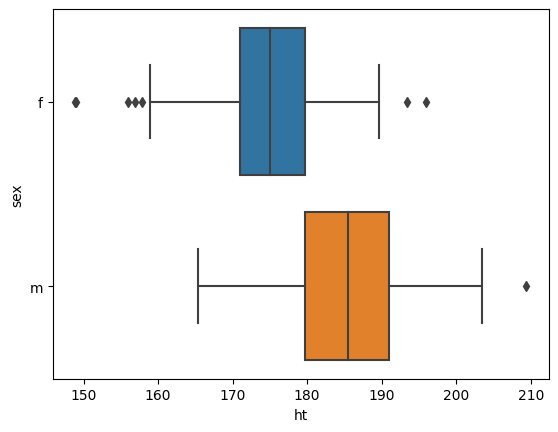

In [15]:
sns.boxplot(data=ais, x='ht', y='sex')

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [17]:
# the rowers ht
ais[ais['sport'] == 'Row']['ht'].describe()['std'] # std -> standaardafwijking
#ais.query("sport == 'Row'")['ht'].std()

7.798376091832815

In [23]:
# the rowers sex
ais[ais['sport'] == 'Row']['sex'].describe()

count     37
unique     2
top        f
freq      22
Name: sex, dtype: object

In [24]:
# the rowers, netball and tennis players together
ais[(ais['sport'] == 'Row') | (ais['sport'] == 'Netball') | (ais['sport'] == 'Tennis')].describe()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,68.845070,4.549437,7.181690,41.478873,13.966197,73.774648,22.784507,86.207042,17.115493,61.013803,179.066197,73.460563
std,49.377163,0.432676,1.791991,3.390909,1.269639,41.177038,2.195909,35.049794,6.445531,11.679727,7.936371,11.205885
min,14.000000,3.800000,3.300000,35.900000,11.800000,13.000000,17.060000,34.800000,6.260000,41.540000,156.000000,45.800000
25%,31.500000,4.235000,6.000000,38.350000,12.850000,42.000000,21.260000,59.250000,11.180000,53.880000,174.250000,67.450000
50%,49.000000,4.460000,6.600000,41.400000,14.000000,70.000000,23.060000,80.300000,17.710000,57.200000,179.500000,73.800000
75%,114.500000,4.885000,8.300000,44.000000,14.800000,91.500000,24.425000,107.950000,21.630000,65.845000,183.400000,80.250000
max,202.000000,5.660000,13.300000,50.200000,17.700000,233.000000,26.790000,200.800000,35.520000,88.000000,198.000000,97.000000


In [25]:
# the female basketball players and rowers together
ais[((ais['sport'] == 'B_Ball') | (ais['sport'] == 'Row')) & (ais['sex'] == 'f')]['ht'].describe()

count     35.000000
mean     180.125714
std        7.144078
min      156.000000
25%      177.400000
50%      179.700000
75%      184.650000
max      195.900000
Name: ht, dtype: float64

In [26]:
# interquartiel afstand (IQR)
ais[ais['sport'] == 'Row']['ht'].describe()['75%'] - ais[ais['sport'] == 'Row']['ht'].describe()['25%']

7.0

## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |